# Data Fetching

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import plotly.offline as of
import plotly.graph_objs as go

of.init_notebook_mode(connected=True)

In [2]:
print("Downloading the data...")
price = sklearn.datasets.fetch_california_housing(as_frame=True)
print("Finish!")

Finish!


### How the data looks like

In [3]:
for item in price:
    print(item)
    print(price[item])
    print()

data
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.2

In [4]:
house = price['frame']
print(house.info())
print(house.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

### Pearson correlation coefficient between House median price and other factors

In [5]:
corr_matrix=house.corr()
corr_matrix["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

# Data Visualization

### Visualizarion of Pearson correlation coefficient between House median price and some relevant factors

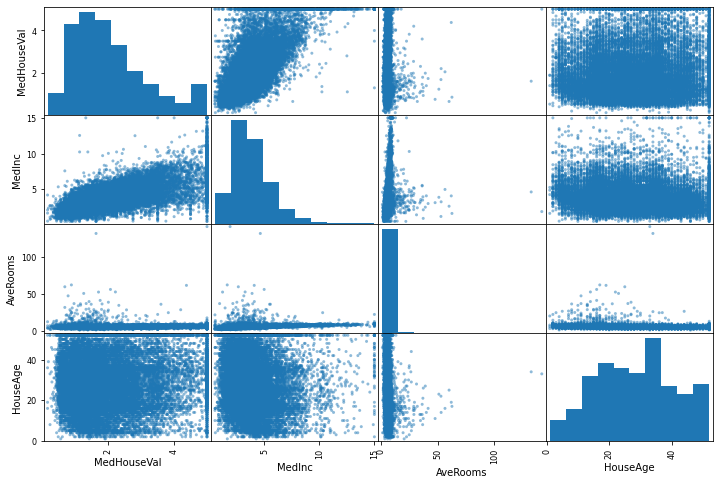

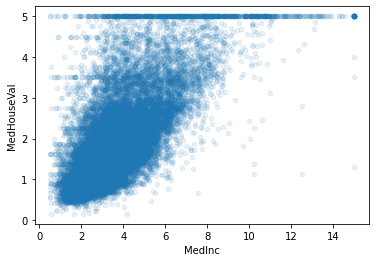

In [6]:
from pandas.plotting import scatter_matrix

attributes=["MedHouseVal","MedInc","AveRooms","HouseAge"]
scatter_matrix(house[attributes],figsize=(12,8))

house.plot(kind="scatter",x="MedInc",y="MedHouseVal",alpha=0.1)

### 3D: 2D + Hotmap

In [7]:
def show_by_position2d(item, house, inpage=False):
    aes = go.Scatter(x=house['Latitude'], 
                     y=house['Longitude'], 
                     mode='markers', 
                     marker=dict(color=house[item], 
                             size=5, 
                             colorscale='Viridis', 
                             showscale=True)
                     )
    layout = go.Layout(title=item, 
                       autosize=False,
                       width=1000, 
                       height=1000,
                       xaxis=dict(title='Latitude'),
                       yaxis=dict(title='Logitude'))

    figure = go.Figure(data=[aes], layout=layout)
    if inpage:
        of.iplot(figure)
    else:
        of.plot(figure)

In [8]:
item = 'MedInc'
show_by_position2d(item, house, False)

In [9]:
item = 'MedHouseVal'
show_by_position2d(item, house, False)

### 3D

In [10]:
item = 'MedHouseVal'


fig = go.Figure(data=[go.Mesh3d(x=house['Latitude'],
                                y=house['Longitude'],
                                z=house[item],
                      opacity=0.5,
                      color='rgb(0,100,0)'
                               )])
 
fig.layout.update(
    scene = dict(
                 xaxis=dict(title='Latitude'),
                 yaxis=dict(title='Logitude'),
                 zaxis=dict(title=item)),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
    
fig.show()

### 4D: 3D + Hotmap

In [11]:
def show_by_position3d(item1, item2, house, inpage=False):
    aes = go.Scatter3d(x=house['Latitude'], 
                     y=house['Longitude'],
                     z=house[item1],
                     marker=dict(color=house[item2], 
                             size=5, 
                             colorscale='Viridis', 
                             showscale=True)
                     )
    layout = go.Layout(title=item2, 
                       autosize=False,
                       width=1000, 
                       height=1000)

    figure = go.Figure(data=[aes], layout=layout)
    figure.layout.update(scene=dict(
                                    xaxis=dict(title='Latitude'),
                                    yaxis=dict(title='Logitude'),
                                    zaxis=dict(title=item1)))
    if inpage:
        of.iplot(figure)
    else:
        of.plot(figure)

In [12]:
item1 = 'MedInc'
item2 = 'MedHouseVal'
show_by_position3d(item1, item2, house, False)

# Data Modeling

### Fetching data

In [3]:
import sklearn.datasets
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm

print("Downloading the data...")
price = sklearn.datasets.fetch_california_housing(as_frame=True)
print("Finish!")

house = price['frame']
print(house.info())
print(house.describe())

Finish!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333

### Function for seperating data randomly

In [4]:
def seperate_random_pandas(percent, data):
    rand_data = data.sample(frac=1.0)
    rand_data = rand_data.reset_index(drop=True)
    wall = int(len(rand_data) * percent)
    data1 = rand_data.loc[0: wall]
    data2 = rand_data.loc[wall+1:]
    return data2, data1

In [4]:
train, test = seperate_random_pandas(0.1, house)

In [22]:
a = np.ones(shape=(20640, 1))

print(house['MedHouseVal'])
test000 = house['MedHouseVal'].values.reshape((house['MedHouseVal'].values.size, 1))
print(test000.shape)
print(a)
print(a.shape)
print(house['MedHouseVal'].values.size)
print(a-test000)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64
(20640, 1)
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
(20640, 1)
20640
[[-3.526]
 [-2.585]
 [-2.521]
 ...
 [ 0.077]
 [ 0.153]
 [ 0.106]]


### Data preperation

In [5]:
## transform x into \xi
def trans_xi(data, factors, max_grade=4, show=False):
    ret = np.ones(shape=(len(data), pow(max_grade+1, len(factors))), dtype=np.float64)
    if show:
        with tqdm(total=pow(max_grade+1, len(factors))-max_grade-1) as pbar:
            for i in range(len(factors)):
                for grade in range(max_grade+1):
                    if i == 0:
                        if grade != 0:
                            ret[:, grade] = data[factors[i]] * ret[:, grade-1]
                    else:
                        now_vec = ret[:, 0:pow(max_grade+1, i)]
                        if grade != 0:
                            for j in range(pow(max_grade+1, i)):
                                ret[:, grade * pow(max_grade+1, i) + j] = now_vec[:, j] * pow(data[factors[i]], grade)
                                pbar.update(1)
    else:
        for i in range(len(factors)):
            for grade in range(max_grade+1):
                if i == 0:
                    if grade != 0:
                        ret[:, grade] = data[factors[i]] * ret[:, grade-1]
                else:
                    now_vec = ret[:, 0:pow(max_grade+1, i)]
                    if grade != 0:
                        for j in range(pow(max_grade+1, i)):
                            ret[:, grade * pow(max_grade+1, i) + j] = now_vec[:, j] * pow(data[factors[i]], grade)
    return ret

In [13]:
xi = trans_xi(house, ['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveBedrms', 'AveRooms'], 4, show=True)
print(xi.shape)
print(xi[0])
print(house['MedInc'][0])
print(house['MedHouseVal'][0])

100%|███████████████████████████████████████████████████████████████████████████| 15620/15620 [00:32<00:00, 482.70it/s]


(20640, 15625)
[1.00000000e+00 8.32520000e+00 6.93089550e+01 ... 3.55146022e+21
 2.95666166e+22 2.46147997e+23]
8.3252
4.526


In [20]:
def seperate_random_np(percent, X, Y):
    new_X = copy.deepcopy(X)
    new_Y = copy.deepcopy(Y)
    
    state = np.random.get_state()
    np.random.shuffle(new_X)
    np.random.set_state(state)
    np.random.shuffle(Y)
    
    wall = int(len(new_X) * percent)
    X1 = new_X[0: wall]
    X2 = new_X[wall+1:]
    Y1 = new_Y[0: wall]
    Y2 = new_Y[wall+1:]
    
    return X2, X1, Y2, Y1

### Linear regression

In [120]:
## define a class for linear regretion
class LinearRegression():
    """
    n_iters:            iteration times
    learning_rate:      learning rate
    alpha:              alpha for L2 regularization
    tolerant:           minimum tolerant error
    batch_size:         batch size
    """
    def __init__(self, n_iters, learning_rate, alpha, tolerant, batch_size):
        self.n_iters = n_iters
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.tolerant = tolerant
        self.batch_size = batch_size
        
    def init_weights(self, n_features):
        limit = np.sqrt(1 / n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, 1))
    
    def prediction(self, X):
        return X.dot(self.w)
    
    ## L2 regularization
    def regularization(self):
        loss = self.w.T.dot(self.w)
        return 0.5 * self.alpha * float(loss)
        
    def fit(self, X, y):
        m_samples, n_features = X.shape
        self.init_weights(n_features)
        self.training_errors = []
        
        for i in range(self.n_iters):
            ## shuffle the training data at each iter
            state = np.random.get_state()
            np.random.shuffle(X)
            np.random.set_state(state)
            np.random.shuffle(y)
            for offset in range(0, m_samples, self.batch_size):
                end = offset + self.batch_size
                x_batch = X[offset:end]
                y_batch = y[offset:end]
                y_pred = self.prediction(x_batch)
                # Calculate the loss
                error = np.sum(0.5 * (y_pred - y_batch) ** 2)
                loss = error + self.regularization()
#                 print('batch: ', error, loss)
                # Calculate the gradient
                w_grad = x_batch.T.dot(y_pred - y_batch) + self.alpha * self.w
                # Update the weight
                self.w -= self.learning_rate * w_grad
            error = np.mean(0.5 * (self.prediction(X) - y) ** 2)
            self.training_errors.append(error)
            print('iter: ',error)
            if error < self.tolerant:
                print('break')
                break

In [124]:
## standarization of the xi
def standardization(X):
    mu = np.mean(X, axis=0)
    divid = X.max(axis=0) - X.min(axis=0)
#     sigma = X.std(axis=0)
    mu[0] = 0
    divid[0] = 1
    return ((X - mu) / divid).astype(np.float16)

features = ['Latitude', 'Longitude']
X = trans_xi(house, features)
Y = house['MedHouseVal'].values.reshape((house['MedHouseVal'].values.size, 1))

X_Stand = standardization(X)

Train_x, Test_x, Train_y, Test_y = seperate_random_np(0.2, X_Stand, Y)

x_train, x_valid, y_train, y_valid = seperate_random_np(0.2, Train_x, Train_y)
print(abs(x_train).max(axis=0))
print(abs(x_train).min(axis=0))

model = LinearRegression(3000, 0.001, 0.5, 0.0001, 128)
model.fit(x_train, y_train)

[1.     0.6714 0.693  0.7134 0.734  0.524  0.649  0.689  0.716  0.7373
 0.515  0.6294 0.6777 0.71   0.7354 0.5063 0.6167 0.671  0.7056 0.7334
 0.5024 0.612  0.6665 0.703  0.732 ]
[1.000e+00 1.978e-04 5.927e-04 6.050e-05 5.689e-04 2.944e-05 4.679e-05
 3.517e-06 9.675e-04 2.018e-04 3.505e-04 9.537e-06 4.847e-04 9.704e-05
 5.474e-04 3.321e-04 1.848e-05 3.582e-05 1.439e-04 9.209e-05 1.991e-05
 2.766e-04 2.866e-04 2.563e-05 7.617e-05]
iter:  0.6682169539858409
iter:  0.6679473106470175
iter:  0.6681683816581734
iter:  0.6689298607958263
iter:  0.6696149429619667
iter:  0.6681877398453584
iter:  0.6680991645991847
iter:  0.6678834739240024
iter:  0.6685192173973885
iter:  0.6691050568682821
iter:  0.6680667808900939
iter:  0.6690456852809974
iter:  0.6679848572371515
iter:  0.6683477611067996
iter:  0.6679498229067111
iter:  0.6679693089791395
iter:  0.6678893856594758
iter:  0.6685304654308134
iter:  0.6680333882859296
iter:  0.6683921683618097
iter:  0.6697361619274442
iter:  0.66988227637

iter:  0.6683038514577974
iter:  0.6689689017097995
iter:  0.6678866339355399
iter:  0.667896114921532
iter:  0.6685793749632885
iter:  0.6679936732256796
iter:  0.6680411097189773
iter:  0.668394885950206
iter:  0.6679575512642578
iter:  0.6692802550658778
iter:  0.6687622639774047
iter:  0.6682002960857276
iter:  0.6694401916327608
iter:  0.6683640476398357
iter:  0.6688110937538911
iter:  0.6683041560601161
iter:  0.6686482337415511
iter:  0.6682270863075834
iter:  0.668828484708358
iter:  0.6720553693386442
iter:  0.66880509593021
iter:  0.6678990354658361
iter:  0.6681685288023208
iter:  0.6686999208676278
iter:  0.6679485832284634
iter:  0.6684878697697723
iter:  0.6691290064869575
iter:  0.6679357648034355
iter:  0.6682568911157668
iter:  0.6682367813382457
iter:  0.668766723765366
iter:  0.6683033358656202
iter:  0.6690255558041364
iter:  0.6688441836018891
iter:  0.6697770778703418
iter:  0.6683998578722723
iter:  0.6686984554813814
iter:  0.6686463652217051
iter:  0.667892520

iter:  0.6680841522006978
iter:  0.6680283648404416
iter:  0.6706358331427975
iter:  0.6697647297393605
iter:  0.6693922734757547
iter:  0.66895059046667
iter:  0.668721359427891
iter:  0.6686737154077023
iter:  0.6688361757201893
iter:  0.668912758851929
iter:  0.6687554467281397
iter:  0.6691047600173926
iter:  0.6684418361820332
iter:  0.6679516397614588
iter:  0.6689668955491601
iter:  0.6678852414668405
iter:  0.6679151292556786
iter:  0.6699578260407207
iter:  0.6679696651092211
iter:  0.6697393374307191
iter:  0.6693890099267527
iter:  0.6679987282586767
iter:  0.6680051218454377
iter:  0.669595097220875
iter:  0.6702541690974527
iter:  0.6680469650923476
iter:  0.6689953080270271
iter:  0.6680058016159791
iter:  0.6689727101879609
iter:  0.670176556288772
iter:  0.6684488013749152
iter:  0.6690935284511325
iter:  0.6685836499910088
iter:  0.6683484354943239
iter:  0.6681287628191398
iter:  0.6686334072568472
iter:  0.668622842908517
iter:  0.6683383609248315
iter:  0.6679102034

iter:  0.6693519879538209
iter:  0.6684208317009648
iter:  0.6683331790190159
iter:  0.6697039466547897
iter:  0.6685333284906975
iter:  0.6680801997884445
iter:  0.6686212919340898
iter:  0.6680595494483342
iter:  0.6699928604150378
iter:  0.6690751617382642
iter:  0.6683421397172945
iter:  0.668645457203088
iter:  0.6678847734567759
iter:  0.6679484397042981
iter:  0.6692727541623614
iter:  0.6682532939944911
iter:  0.668007980145522
iter:  0.6686890132275753
iter:  0.6679275487196404
iter:  0.6687914125013474
iter:  0.6685808236240567
iter:  0.669700371286572
iter:  0.6686913132532917
iter:  0.6702521527642925
iter:  0.6694455276907972
iter:  0.6698533943380667
iter:  0.6685225445538493
iter:  0.6697199835444666
iter:  0.6679203864373112
iter:  0.6681083876754188
iter:  0.6694733857526819
iter:  0.6680114585490596
iter:  0.668729437066211
iter:  0.6682458337032507
iter:  0.6679320209612198
iter:  0.6691951012669722
iter:  0.6688663919301864
iter:  0.6680587019402098
iter:  0.6680649

iter:  0.6681138244774739
iter:  0.6683749406274152
iter:  0.6680268083351135
iter:  0.6680248378054651
iter:  0.6679492576026318
iter:  0.6686292738805508
iter:  0.668059455749806
iter:  0.668034059072454
iter:  0.6683770174845525
iter:  0.6682376090227518
iter:  0.6682063397613323
iter:  0.6682640032849386
iter:  0.6680224507612806
iter:  0.6686599078720831
iter:  0.6687614787797757
iter:  0.6684568068316759
iter:  0.6681263864686611
iter:  0.6679002813470376
iter:  0.6680811723416474
iter:  0.6688250086216687
iter:  0.6682440316596527
iter:  0.6679742575990361
iter:  0.6682900587865882
iter:  0.6691862093983861
iter:  0.6680522794978552
iter:  0.6679721064099158
iter:  0.6689314981151683
iter:  0.6697199413722645
iter:  0.6683930657940806
iter:  0.668195490624246
iter:  0.6681840382009135
iter:  0.668498291993134
iter:  0.6697668313270312
iter:  0.6700859933751047
iter:  0.6684917062261466
iter:  0.6683863265676446
iter:  0.6701890467169533
iter:  0.6689366642356838
iter:  0.6691871

iter:  0.6679520133574792
iter:  0.6684064350975809
iter:  0.6680882049070531
iter:  0.6683134429940367
iter:  0.6681149493655351
iter:  0.6719111037326223
iter:  0.668201421826711
iter:  0.6679936529903553
iter:  0.6687203879810812
iter:  0.667947996051748
iter:  0.6684327111055038
iter:  0.6683306361578764
iter:  0.6689288401890335
iter:  0.6685972414522074
iter:  0.6692687559954366
iter:  0.6686985870785696
iter:  0.6680129395876997
iter:  0.6679622357347674
iter:  0.6684964402655191
iter:  0.6682484021651531
iter:  0.6694315311411888
iter:  0.6684276410771419
iter:  0.668484945995333
iter:  0.6681455437897745
iter:  0.6682013630612358
iter:  0.6682769400039283
iter:  0.6695954940340163
iter:  0.6679266218123886
iter:  0.6682253289633501
iter:  0.6692279960154041
iter:  0.6680881068194059
iter:  0.6683395052083125
iter:  0.6681127696129489
iter:  0.6696962751128256
iter:  0.669523072988741
iter:  0.6701550590436866
iter:  0.6681848154634614
iter:  0.6685770993042588
iter:  0.6679799

iter:  0.6689509358031228
iter:  0.6683060685543646
iter:  0.668411242928607
iter:  0.6699061456532892
iter:  0.6678931716405777
iter:  0.6680002653554943
iter:  0.6693432228396768
iter:  0.6689702993229828
iter:  0.670232020934301
iter:  0.6699600427673519
iter:  0.6688678400747181
iter:  0.668541764996772
iter:  0.6686246469095785
iter:  0.6683030262239101
iter:  0.668365750039324
iter:  0.6684209569428795
iter:  0.6685371927029733
iter:  0.6682487863538971
iter:  0.668559622159342
iter:  0.6679636270188123
iter:  0.6682555188172704
iter:  0.6685301472907484
iter:  0.6699077888270051
iter:  0.669656236589113
iter:  0.6708415042849512
iter:  0.6680191406454664
iter:  0.6678934189850415
iter:  0.668046138369151
iter:  0.6679129722442463
iter:  0.6697813755978447
iter:  0.6689316751445795
iter:  0.6679328477266067
iter:  0.6680839809396806
iter:  0.6679269040037042
iter:  0.6680522343590425
iter:  0.6682181521914842
iter:  0.6679147692412776
iter:  0.6686118042095741
iter:  0.6684683673

iter:  0.667934754606438
iter:  0.6680278490224739
iter:  0.6684109790034475
iter:  0.6679724093766323
iter:  0.6685026480933776
iter:  0.6679135914309658
iter:  0.6679664658762481
iter:  0.6681710176660018
iter:  0.6684525932355473
iter:  0.6693628172879204
iter:  0.6679861199759575
iter:  0.6680181101352999
iter:  0.6679624210905284
iter:  0.6694059734727563
iter:  0.669667749718112
iter:  0.670606343565416
iter:  0.6681806784857157
iter:  0.6686356816730109
iter:  0.6680390270470742
iter:  0.667913080256464
iter:  0.6679426727603364
iter:  0.6694293591728377
iter:  0.6689350999257686
iter:  0.6679584086837761
iter:  0.6682712200573752
iter:  0.66794021027328
iter:  0.670533536987457
iter:  0.6683839203760172
iter:  0.6683318744295303
iter:  0.66817249434411
iter:  0.6683839642023862
iter:  0.6687635505856561
iter:  0.6689388563135226
iter:  0.6681601720521674
iter:  0.6680286509810691
iter:  0.6680701802539606
iter:  0.6684209234698114
iter:  0.668141757894274
iter:  0.6679448248707

iter:  0.6679465153123134
iter:  0.6684953885243871
iter:  0.6680292144635176
iter:  0.669378647094506
iter:  0.6681787163081316
iter:  0.6692316775593683
iter:  0.6685336556366631
iter:  0.6681697683408908
iter:  0.6686432620739576
iter:  0.6682424610917904
iter:  0.6679710642876829
iter:  0.6690326295762228
iter:  0.6681746048090725
iter:  0.6686744411038094
iter:  0.6687062986673525
iter:  0.6693772003658403
iter:  0.668474513625353
iter:  0.6680306451547735
iter:  0.6679543498268946
iter:  0.6685235531540608
iter:  0.6685815690169378
iter:  0.6680000600754789
iter:  0.6680421976458717
iter:  0.6679663912274562
iter:  0.6679211831625489
iter:  0.6691095834310827
iter:  0.6691092950034552
iter:  0.6684283548328057
iter:  0.6679834095203009
iter:  0.6682300009637677
iter:  0.6683145276724998
iter:  0.6681763016837813
iter:  0.6680890074358958
iter:  0.668204694864237
iter:  0.6679126908549173
iter:  0.6681809746909041
iter:  0.6680464765133486
iter:  0.6680069315702498
iter:  0.667897

iter:  0.6681386566278007
iter:  0.6692480605912299
iter:  0.6684855720515069
iter:  0.6681378824668189
iter:  0.6682287332167052
iter:  0.6683924522524072
iter:  0.66916229490597
iter:  0.6681524714248209
iter:  0.6693103369671914
iter:  0.6686395561765891
iter:  0.6681225702776529
iter:  0.6679686690129583
iter:  0.6684321461957387
iter:  0.6681973109148552
iter:  0.6679112990898449
iter:  0.6680406906003642
iter:  0.6684822677124697
iter:  0.6686715323307151
iter:  0.6679420299312273
iter:  0.6685866159045724
iter:  0.6683352357270198
iter:  0.6683691714811586
iter:  0.6698727076051942
iter:  0.6695162806552254
iter:  0.6679233314198061
iter:  0.6682232397727765
iter:  0.6688411250163007
iter:  0.6681619106391946
iter:  0.6683745569491593
iter:  0.6679307985061771
iter:  0.6679445763734178
iter:  0.6683763262085167
iter:  0.6695830495445176
iter:  0.668295346569938
iter:  0.6689165718856911
iter:  0.6687072273347264
iter:  0.6689892291938645
iter:  0.6685266008131135
iter:  0.669515

In [97]:
## standarization of x
new_house = (house - house.mean())/(house.max()- house.min())
# print(abs(new_house).max())
# print(abs(new_house).min())
new_house['MedHouseVal'] = house['MedHouseVal']
Train, Test = seperate_random_pandas(0.2, new_house)
Train, Test = seperate_random_pandas(0.2, new_house)
train, valid = seperate_random_pandas(0.2, Train)

features = ['Latitude', 'Longitude']
x_train = trans_xi(train, features)
# x_train = (x_train - x_train.mean(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
y_train = train['MedHouseVal'].values.reshape((train['MedHouseVal'].values.size, 1))

x_valid = trans_xi(valid, features)
y_valid = valid['MedHouseVal'].values.reshape((valid['MedHouseVal'].values.size, 1))

model = LinearRegression(3000, 0.0001, 0.5, 0.0001, 128)
model.fit(x_train, y_train)
# print(model.training_errors)

3.1864652865799874 3.283269036826118
0.9426673052211022 2.9901158767168865
0.6997824602194749 1.617255980692181
0.6734039228780705 1.9093986651544546
0.6705205990208676 1.7955985367225085
0.6701748570370715 1.8308112548341464
0.6701152430511564 1.818728180735496
0.6700901393202998 1.8224437306352745
0.6700732594430404 1.8210246843640676
0.670060176538584 1.8213317300263756
0.6700499490033064 1.8210980417434905
0.6700418649857314 1.821063426504011
0.6700354570829851 1.82097989129635
0.6700303447437325 1.8209254975331128
0.6700262398168827 1.8208718123848406
0.670022916625785 1.8208260545523323
0.6700202008673389 1.8207841865117143
0.670017957109987 1.8207462427909582
0.670016080388292 1.8207112041622542
0.6700144892603744 1.8206786203644896
0.6700131205630019 1.8206480266106886
0.6700119252979336 1.8206190971041005
0.6700108654566116 1.8205915646551145
0.6700099115525346 1.8205652239348848
0.6700090407090877 1.8205399123903376
0.670008235175994 1.820515502530384
0.6700074811788994 1.820

0.6699259251172022 1.8222928715382785
0.6699257729998181 1.8223115467235456
0.6699256213740916 1.8223302508318906
0.6699254702368329 1.822348983606829
0.6699253195848767 1.822367744794859
0.6699251694150825 1.8223865341454313
0.6699250197243342 1.8224053514109237
0.6699248705095395 1.8224241963466086
0.6699247217676311 1.822443068710626
0.6699245734955646 1.8224619682639578
0.6699244256903194 1.822480894770397
0.6699242783488987 1.8224998479965215
0.6699241314683285 1.8225188277116668
0.6699239850456575 1.8225378336879023
0.6699238390779582 1.8225568656999966
0.6699236935623244 1.8225759235254002
0.6699235484958737 1.8225950069442132
0.6699234038757447 1.8226141157391627
0.6699232596990987 1.8226332496955753
0.6699231159631186 1.822652408601352
0.6699229726650092 1.8226715922469423
0.6699228298019965 1.822690800425323
0.669922687371328 1.8227100329319683
0.6699225453702722 1.8227292895648286
0.6699224037961182 1.8227485701243036
0.6699222626461767 1.822767874413222
0.6699221219177784 1

0.6698936739569166 1.8286069316976301
0.6698935920169109 1.8286300100098194
0.6698935101820256 1.8286531008168736
0.6698934284518633 1.8286762041354319
0.6698933468260299 1.8286993199821864
0.6698932653041333 1.8287224483738767
0.669893183885784 1.828745589327294
0.669893102570595 1.8287687428592763
0.6698930213581812 1.8287919089867049
0.6698929402481604 1.8288150877265066
0.6698928592401525 1.8288382790956508
0.66989277833378 1.8288614831111463
0.6698926975286673 1.8288846997900419
0.6698926168244418 1.8289079291494237
0.6698925362207323 1.8289311712064116
0.6698924557171706 1.8289544259781632
0.6698923753133906 1.8289776934818676
0.6698922950090281 1.8290009737347437
0.6698922148037217 1.8290242667540415
0.6698921346971117 1.82904757255704
0.6698920546888413 1.8290708911610447
0.6698919747785546 1.8290942225833848
0.6698918949658992 1.8291175668414177
0.6698918152505244 1.8291409239525183
0.6698917356320814 1.829164293934086
0.6698916561102237 1.8291876768035398
0.669891576684607 1.

0.6698729138235003 1.8360240468928315
0.6698728524342215 1.8360514481661112
0.6698727910934811 1.836078865441185
0.6698727298011963 1.8361062987201997
0.6698726685572846 1.8361337480052322
0.669872607361664 1.8361612132982925
0.6698725462142529 1.8361886946013182
0.6698724851149698 1.8362161919161812
0.669872424063734 1.8362437052446827
0.6698723630604645 1.8362712345885561
0.6698723021050811 1.8362987799494666
0.6698722411975037 1.8363263413290092
0.6698721803376527 1.836353918728714
0.6698721195254489 1.836381512150039
0.6698720587608131 1.8364091215943779
0.6698719980436666 1.8364367470630545
0.669871937373931 1.8364643885573253
0.6698718767515286 1.836492046078379
0.6698718161763814 1.8365197196273373
0.669871755648412 1.8365474092052552
0.6698716951675433 1.8365751148131206
0.6698716347336986 1.836602836451851
0.6698715743468017 1.8366305741223026
0.6698715140067759 1.8366583278252608
0.6698714537135458 1.8366860975614454
0.6698713934670357 1.8367138833315102
0.6698713332671706 1.

0.669857185855537 1.8444410062279286
0.6698571358367906 1.8444728168406503
0.6698570858517321 1.8445046418617637
0.6698570359003274 1.8445364812799836
0.6698569859825424 1.8445683350839972
0.6698569360983434 1.844600203262467
0.6698568862476963 1.8446320858040304
0.6698568364305676 1.8446639826972997
0.6698567866469234 1.8446958939308595
0.66985673689673 1.8447278194932735
0.6698566871799542 1.8447597593730785
0.6698566374965622 1.8447917135587857
0.6698565878465207 1.8448236820388821
0.6698565382297965 1.8448556648018317
0.6698564886463559 1.8448876618360717
0.6698564390961663 1.8449196731300181
0.669856389579194 1.8449516986720584
0.6698563400954064 1.844983738450562
0.6698562906447703 1.8450157924538682
0.6698562412272527 1.8450478606702974
0.6698561918428209 1.8450799430881442
0.6698561424914419 1.845112039695679
0.6698560931730831 1.8451441504811505
0.669856043887712 1.8451762754327845
0.6698559946352958 1.8452084145387806
0.6698559454158021 1.8452405677873185
0.6698558962291984 1

0.669844096444748 1.8541126897349938
0.66984405491314 1.8541481034951008
0.6698440134075444 1.8541835277939738
0.6698439719279398 1.8542189626171277
0.6698439304743047 1.8542544079500796
0.6698438890466174 1.8542898637783394
0.6698438476448565 1.8543253300874245
0.6698438062690009 1.8543608068628454
0.6698437649190288 1.8543962940901177
0.6698437235949188 1.854431791754754
0.66984368229665 1.854467299842269
0.6698436410242005 1.8545028183381738
0.6698435997775493 1.854538347227984
0.6698435585566751 1.854573886497212
0.6698435173615566 1.8546094361313723
0.6698434761921728 1.8546449961159799
0.6698434350485019 1.8546805664365476
0.6698433939305232 1.854716147078591
0.6698433528382155 1.8547517380276246
0.6698433117715575 1.8547873392691643
0.6698432707305284 1.8548229507887264
0.6698432297151068 1.8548585725718278
0.6698431887252718 1.8548942046039838
0.6698431477610023 1.8549298468707145
0.6698431068222774 1.854965499357537
0.6698430659090762 1.8550011620499711
0.6698430250213773 1.85

0.6698338331897689 1.8639351012570637
0.6698337979304357 1.8639728290585853
0.6698337626921155 1.8640105636334057
0.6698337274747916 1.8640483049682777
0.669833692278448 1.8640860530499639
0.6698336571030684 1.864123807865234
0.6698336219486366 1.864161569400867
0.6698335868151366 1.8641993376436476
0.6698335517025522 1.86423711258037
0.6698335166108674 1.8642748941978367
0.6698334815400657 1.8643126824828569
0.6698334464901314 1.8643504774222497
0.6698334114610482 1.8643882790028403
0.6698333764528002 1.8644260872114637
0.6698333414653711 1.8644639020349612
0.6698333064987454 1.864501723460185
0.6698332715529066 1.8645395514739929
0.6698332366278387 1.86457738606325
0.6698332017235259 1.8646152272148337
0.669833166839952 1.8646530749156247
0.6698331319771013 1.8646909291525167
0.6698330971349578 1.864728789912407
0.6698330623135057 1.864766657182205
0.6698330275127287 1.8648045309488248
0.669832992732611 1.864842411199191
0.6698329579731372 1.8648802979202372
0.6698329232342909 1.8649

0.669825450361647 1.873779385716499
0.6698254199914804 1.873818439036557
0.6698253896386258 1.8738574960266194
0.6698253593030709 1.8738965566757662
0.6698253289848026 1.873935620973085
0.669825298683808 1.8739746889076736
0.6698252684000744 1.8740137604686389
0.669825238133589 1.874052835645099
0.669825207884339 1.8740919144261805
0.6698251776523112 1.8741309968010182
0.6698251474374932 1.8741700827587597
0.6698251172398725 1.8742091722885599
0.6698250870594358 1.8742482653795833
0.6698250568961706 1.874287362021005
0.669825026750064 1.8743264622020095
0.6698249966211034 1.8743655659117897
0.6698249665092763 1.8744046731395514
0.6698249364145696 1.8744437838745045
0.669824906336971 1.8744828981058743
0.6698248762764674 1.8745220158228908
0.6698248462330464 1.874561137014798
0.6698248162066952 1.8746002616708473
0.6698247861974014 1.874639389780298
0.6698247562051519 1.874678521332422
0.6698247262299346 1.8747176563164998
0.6698246962717366 1.8747567947218213
0.6698246663305453 1.87479

0.6698178396818514 1.8844236965224632
0.6698178135528099 1.8844633750368378
0.6698177874379786 1.88450305461643
0.669817761337347 1.8845427352528417
0.6698177352509053 1.8845824169376826
0.6698177091786427 1.8846220996625713
0.6698176831205496 1.8846617834191348
0.6698176570766152 1.884701468199012
0.6698176310468299 1.8847411539938457
0.6698176050311833 1.8847808407952906
0.669817579029665 1.8848205285950115
0.6698175530422651 1.8848602173846776
0.6698175270689734 1.884899907155971
0.6698175011097797 1.8849395979005812
0.6698174751646737 1.8849792896102062
0.6698174492336457 1.8850189822765528
0.6698174233166853 1.8850586758913366
0.6698173974137822 1.8850983704462834
0.6698173715249267 1.885138065933125
0.6698173456501084 1.885177762343605
0.6698173197893175 1.885217459669474
0.6698172939425436 1.8852571579024908
0.6698172681097768 1.885296857034425
0.6698172422910071 1.8853365570570533
0.6698172164862243 1.8853762579621618
0.6698171906954185 1.8854159597415456
0.6698171649185795 1.8

0.6698117246722738 1.8943562364305775
0.6698117017979011 1.8943959417950538
0.6698116789354248 1.8944356463871581
0.6698116560848367 1.8944753502005414
0.6698116332461289 1.894515053228858
0.6698116104192924 1.8945547554657725
0.6698115876043191 1.894594456904956
0.6698115648012011 1.8946341575400885
0.6698115420099297 1.8946738573648552
0.6698115192304964 1.8947135563729507
0.6698114964628934 1.8947532545580763
0.6698114737071119 1.89479295191394
0.6698114509631442 1.894832648434258
0.6698114282309815 1.8948723441127544
0.6698114055106158 1.8949120389431595
0.669811382802039 1.894951732919214
0.6698113601052422 1.89499142603466
0.6698113374202179 1.8950311182832542
0.6698113147469574 1.8950708096587552
0.6698112920854525 1.895110500154932
0.6698112694356952 1.895150189765559
0.6698112467976772 1.8951898784844206
0.6698112241713902 1.8952295663053063
0.6698112015568258 1.8952692532220135
0.6698111789539763 1.895308939228347
0.6698111563628331 1.8953486243181195
0.6698111337833881 1.895

0.6698059748929683 1.9049902955040638
0.6698059549383639 1.9050295869548517
0.6698059349936355 1.9050688761762036
0.6698059150587766 1.9051081631635745
0.6698058951337801 1.9051474479124266
0.6698058752186398 1.9051867304182273
0.6698058553133487 1.905226010676453
0.6698058354178998 1.9052652886825814
0.669805815532287 1.9053045644320998
0.6698057956565032 1.9053438379204994
0.6698057757905417 1.9053831091432785
0.6698057559343961 1.9054223780959405
0.6698057360880594 1.9054616447739958
0.6698057162515249 1.90550090917296
0.669805696424786 1.9055401712883524
0.6698056766078363 1.9055794311157044
0.6698056568006687 1.905618688650546
0.6698056370032768 1.905657943888418
0.6698056172156539 1.9056971968248653
0.6698055974377931 1.9057364474554386
0.6698055776696881 1.9057756957756953
0.6698055579113321 1.9058149417811974
0.6698055381627187 1.9058541854675144
0.6698055184238408 1.90589342683022
0.6698054986946922 1.905932665864896
0.6698054789752659 1.9059719025671267
0.6698054592655558 1.9

In [122]:
error = model.prediction(x_valid) - y_valid
error_persent = abs(error/y_valid)
print(y_valid)
print(abs(error).max())
print(abs(error).min())
print()
print(error_persent.max())
print(error_persent.min())
print(error_persent.mean())

[[5.00001]
 [3.335  ]
 [1.744  ]
 ...
 [1.83   ]
 [2.048  ]
 [5.00001]]
2.9893244874870692
0.00052803799558232

13.105505109626007
0.0002534987976871435
0.6755128764302792
